##### Cell 1 — Import Dataset & Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("cleaned_financial_transactions.csv")

df.head()


,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status,Year,Month,Day,Month_Name,Year_Month,Transaction_Type,Abs_Price,Refund_Amount,Sales_Amount
0,T0001,2024-08-02,C2205,Headphones,5.0,420.210000,Pay pal,completed,2024,8,2,August,2024-08,Sale,420.210000,0.000000,420.210000
1,T0002,2020-02-10,C3156,Coffee Machine,469.0,-445.342025,Creditcard,pending,2020,2,10,February,2020-02,Refund/Reversal,445.342025,445.342025,0.000000
2,T0004,2020-08-17,C3009,Tablet,7.0,868.608341,Paypal,pending,2020,8,17,August,2020-08,Sale,868.608341,0.000000,868.608341
3,T0014,2020-06-19,C2992,Coffee Machine,696.0,905.514730,Creditcard,failed,2020,6,19,June,2020-06,Sale,905.514730,0.000000,905.514730
4,T0017,2020-07-07,C3776,Smartphone,236.0,-94.557265,Credit card,pending,2020,7,7,July,2020-07,Refund/Reversal,94.557265,94.557265,0.000000


##### Cell 2 — Distribution of Sales Amount (Histogram)

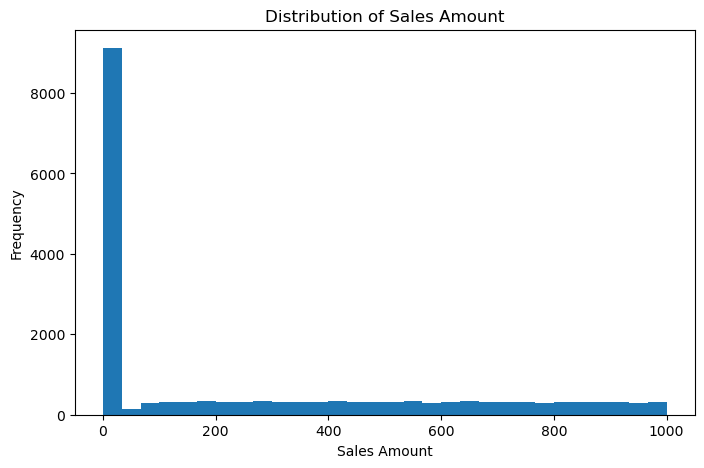

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['Sales_Amount'], bins=30)
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Sales Amount")
plt.show()



##### Cell 3 — Sales Amount by Transaction Type (Box Plot)

<Figure size 800x500 with 0 Axes>

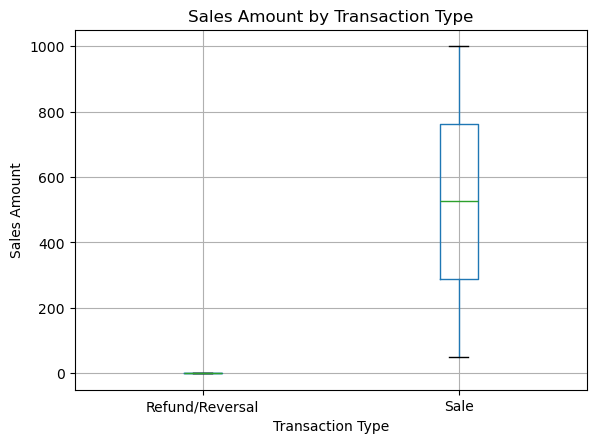

In [ ]:
plt.figure(figsize=(8,5))
df.boxplot(column='Sales_Amount', by='Transaction_Type')
plt.title("Sales Amount by Transaction Type")
plt.suptitle("")
plt.xlabel("Transaction Type")
plt.ylabel("Sales Amount")
plt.show()



##### Cell 4 — Sales Amount Trend Over Time (Line Chart)

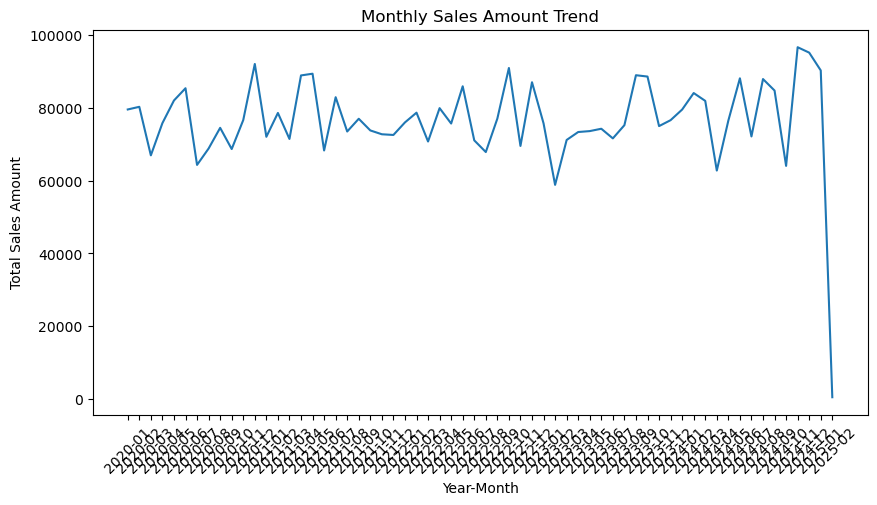

In [ ]:
sales_trend = df.groupby('Year_Month')['Sales_Amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_trend.index, sales_trend.values)
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Total Sales Amount")
plt.title("Monthly Sales Amount Trend")
plt.show()



##### Cell 5 — Sales Amount by Payment Method (Pie Chart)

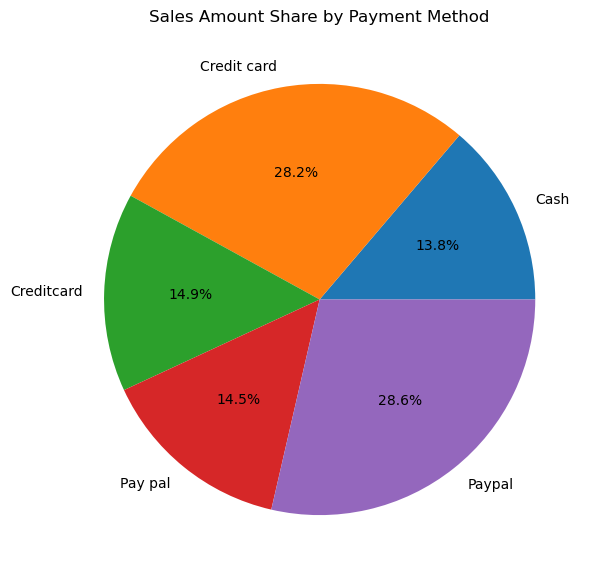

In [ ]:
payment_sales = df.groupby('Payment_Method')['Sales_Amount'].sum()

plt.figure(figsize=(7,7))
plt.pie(payment_sales.values, labels=payment_sales.index, autopct='%1.1f%%')
plt.title("Sales Amount Share by Payment Method")
plt.show()


##### Cell 6 — Top Products by Sales Amount (Horizontal Bar – allowed once)

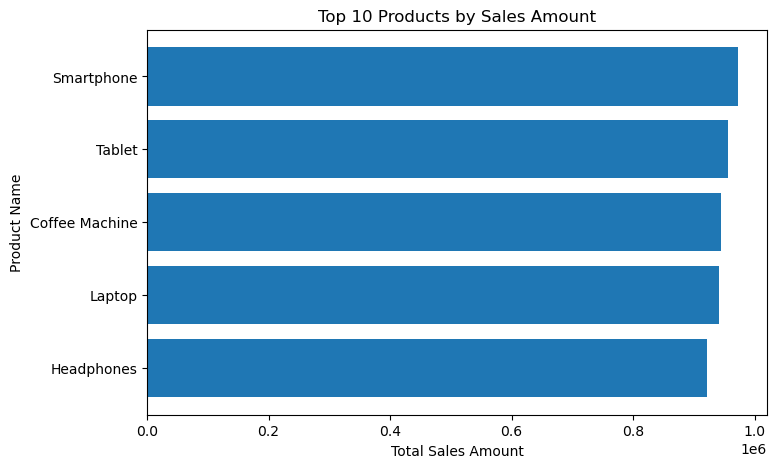

In [ ]:
top_products = (
    df.groupby('Product_Name')['Sales_Amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
plt.barh(top_products.index, top_products.values)
plt.xlabel("Total Sales Amount")
plt.ylabel("Product Name")
plt.title("Top 10 Products by Sales Amount")
plt.gca().invert_yaxis()
plt.show()


##### Cell 7 — Sales Amount vs Refund Amount (Scatter Plot)

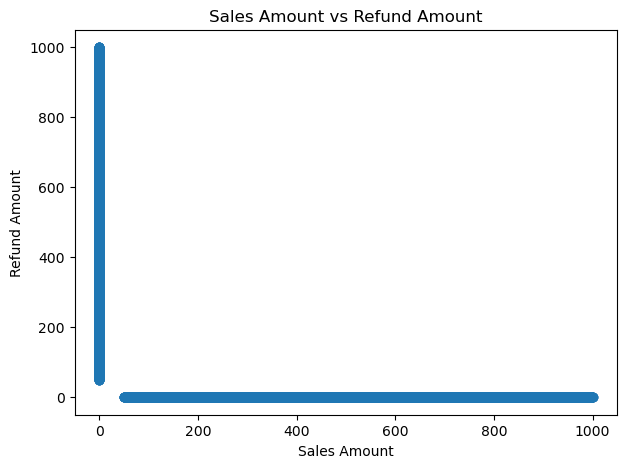

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['Sales_Amount'], df['Refund_Amount'])
plt.xlabel("Sales Amount")
plt.ylabel("Refund Amount")
plt.title("Sales Amount vs Refund Amount")
plt.show()
